# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [133]:
%pip install folium #jfjfff

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#jfjfff': Expected package name at the start of dependency specifier
    #jfjfff
    ^


In [134]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [135]:
import numpy as np
import pandas as pd  # your favorite data package
import seaborn as sns
import matplotlib.pyplot as plt

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [136]:
df = pd.read_csv('train.csv')
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [137]:
print(df.dtypes)


id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [138]:
df = df.drop(columns=['dropoff_datetime'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

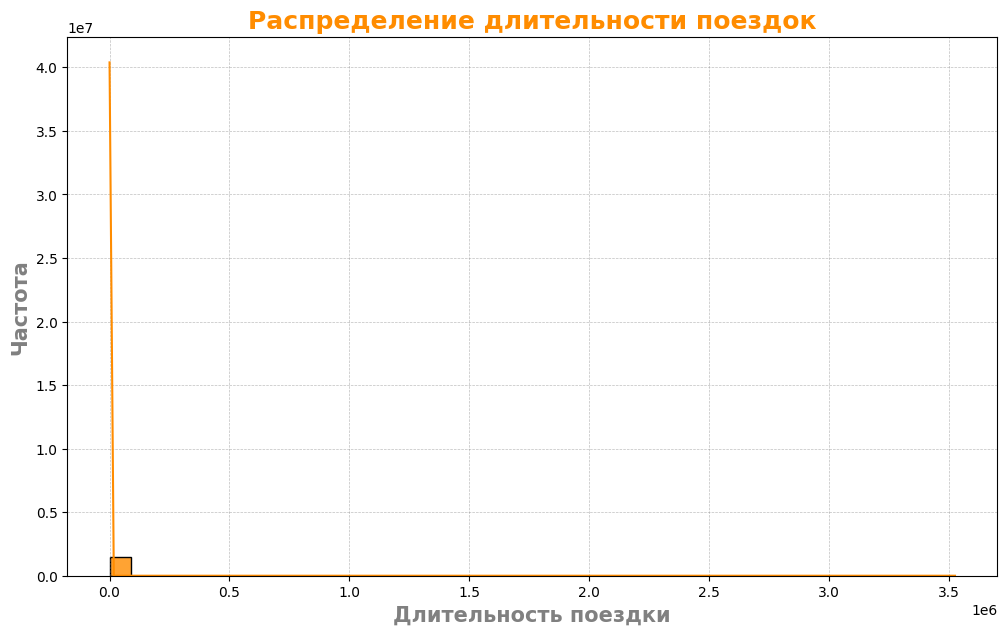

In [139]:
plt.figure(figsize=(12, 7))
sns.histplot(
    data=df, 
    x='trip_duration', 
    bins=40, 
    kde=True, 
    color="darkorange", 
    edgecolor="black",  
    alpha=0.8 
)

plt.title("Распределение длительности поездок", fontsize=18, fontweight='bold', color='darkorange')
plt.xlabel("Длительность поездки", fontsize=15, fontweight='bold', color='gray')
plt.ylabel("Частота", fontsize=15, fontweight='bold', color='gray')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()


**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

**Ответ**: В выборке существуют выбросы, на много порядков отличающиеся от среднего

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

**Ответ** Так как целевая переменная сильно варьируется, логарифмирование может помочь избежать перетягивание большими значениями коэффициентов регрессии на себя, давая более адекватные значения для небольших и средних по времени поездок на такси, коих большинство. Более того, модель не может переобучиться на больших значениях таргета и хронически завышать предскаазния для маленьких поездок, так как теперь ошибка в несколько раз для короткой поездки будет иметь примерно такое же значение как и ошибка в несколько раз для долгой поездки

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: 
$$a(x_i) = \exp(\hat{a}(x_i)) - 1$$ 
$$y_i = \exp(\hat{y}(i)) - 1$$ 
Запишем RMSLE для $a(x_i)$ : 
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(\exp(\hat{y}(i)) - 1 + 1)} - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2} = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \hat{y}(i) - \hat{a}(x_i)^2}$$

Мы получили RMSE, не MSE, но так как у функции и её корня минимум одинаковый MSE эквивалентен RMSE для задачи оптимизации. Ч.Т.Д.

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

In [140]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df.drop(columns=['trip_duration'])

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,6.077642
...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,6.658011
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,6.486161
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,6.639876
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,5.924256


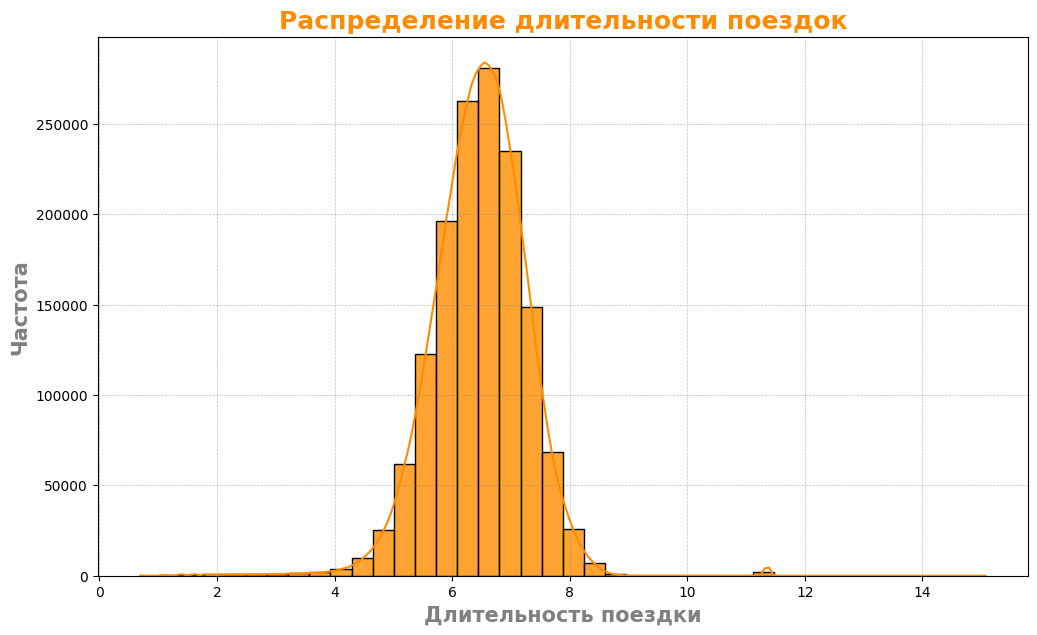

In [141]:
plt.figure(figsize=(12, 7))
sns.histplot(
    data=df, 
    x='log_trip_duration', 
    bins=40, 
    kde=True, 
    color="darkorange", 
    edgecolor="black",  
    alpha=0.8 
)

plt.title("Распределение длительности поездок", fontsize=18, fontweight='bold', color='darkorange')
plt.xlabel("Длительность поездки", fontsize=15, fontweight='bold', color='gray')
plt.ylabel("Частота", fontsize=15, fontweight='bold', color='gray')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [142]:
def rmsle(log1p_y_true, log1p_y_pred):
    return np.sqrt(np.mean(np.power(log1p_y_true - log1p_y_pred, 2)))


rmsle_best_const = rmsle(df.log_trip_duration, np.mean(df.log_trip_duration))
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

In [143]:
df_grouped = df.groupby(pd.Grouper(key='pickup_datetime', freq='D')).size().reset_index(name='count')




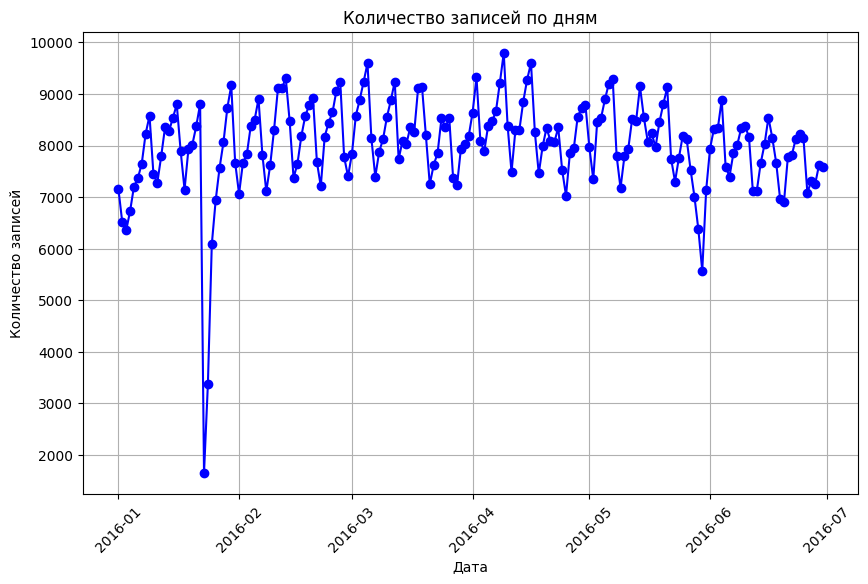

In [144]:
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['pickup_datetime'], df_grouped['count'], marker='o', linestyle='-', color='b')

plt.title("Количество записей по дням")
plt.xlabel("Дата")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.grid(visible=True)

plt.show()

In [145]:
df_sorted = df_grouped.sort_values(by='count', ascending=True)
print(df_sorted.head(3))

    pickup_datetime  count
22       2016-01-23   1648
23       2016-01-24   3383
150      2016-05-30   5570


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

**Ответ**: В конце января 23-24 числа была небывалая метель. В конце мая 30-го числа в США отмечается день памяти павших воинов. Вероятно деловая и развлекательная активноость падает, из-за чего меньше использования такси. Также в этот день был большой сбой на серверах аэропорта, из-за чего многие рейсы перенесли, что также могло повлиять.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [146]:
df_grouped['weekday'] = df_grouped['pickup_datetime'].dt.weekday

df_weekdays = df_grouped.groupby('weekday')['count'].sum().reset_index()

df_weekdays

,weekday,count
0,0,187418
1,1,202749
2,2,210136
3,3,218574
4,4,223533
5,5,220868
6,6,195366


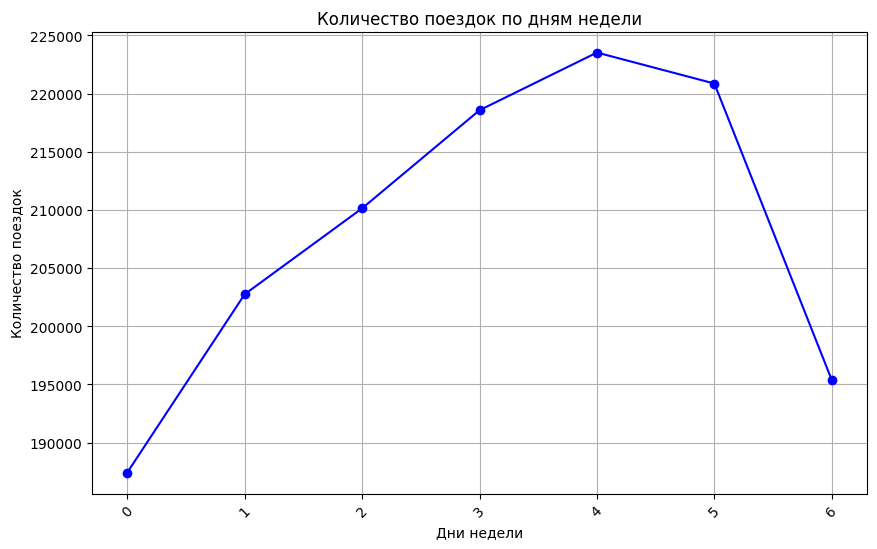

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(df_weekdays['weekday'], df_weekdays['count'], marker='o', linestyle='-', color='b')

plt.title("Количество поездок по дням недели")
plt.xlabel("Дни недели")
plt.ylabel("Количество поездок")
plt.xticks(rotation=45)
plt.grid(visible=True)


plt.show()

In [148]:
df_by_hour = df
df_by_hour['hour'] = df_by_hour['pickup_datetime'].dt.hour
df_hourly_trips = df_by_hour.groupby('hour').size().reset_index(name='trip_count')


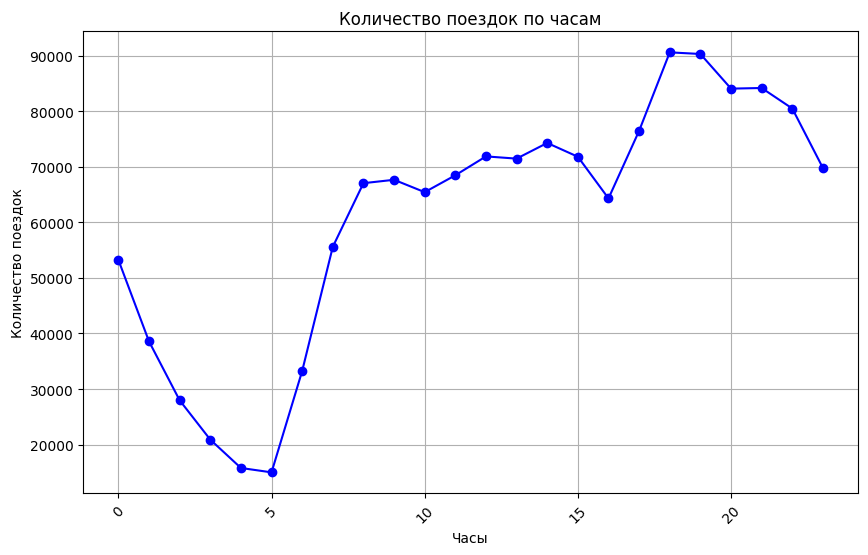

In [149]:
plt.figure(figsize=(10, 6))
plt.plot(df_hourly_trips['hour'], df_hourly_trips['trip_count'], marker='o', linestyle='-', color='b')
plt.title("Количество поездок по часам")
plt.xlabel("Часы")
plt.ylabel("Количество поездок")
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

C:\Users\ANDREW_LOCAL\AppData\Local\Temp\ipykernel_15940\4184713997.py:6: UserWarning: The palette list has more values (7) than needed (6), which may not be intended.
  sns.lineplot(data=df_hourly_month, x='hour', y='trip_count', hue='month', palette=palette)


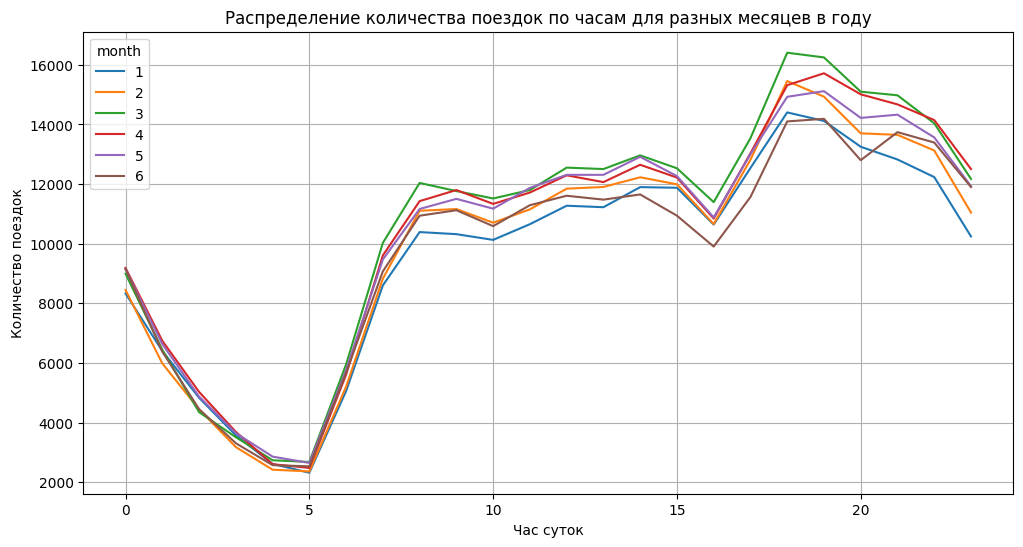

In [150]:
df['hour'] = df['pickup_datetime'].dt.hour
df['month'] = df['pickup_datetime'].dt.month
df_hourly_month = df.groupby(['month', 'hour']).size().reset_index(name='trip_count')
palette = sns.color_palette("tab10", 7)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hourly_month, x='hour', y='trip_count', hue='month', palette=palette)
plt.title("Распределение количества поездок по часам для разных месяцев в году")
plt.xlabel("Час суток")
plt.ylabel("Количество поездок")
plt.grid(True)
plt.show()

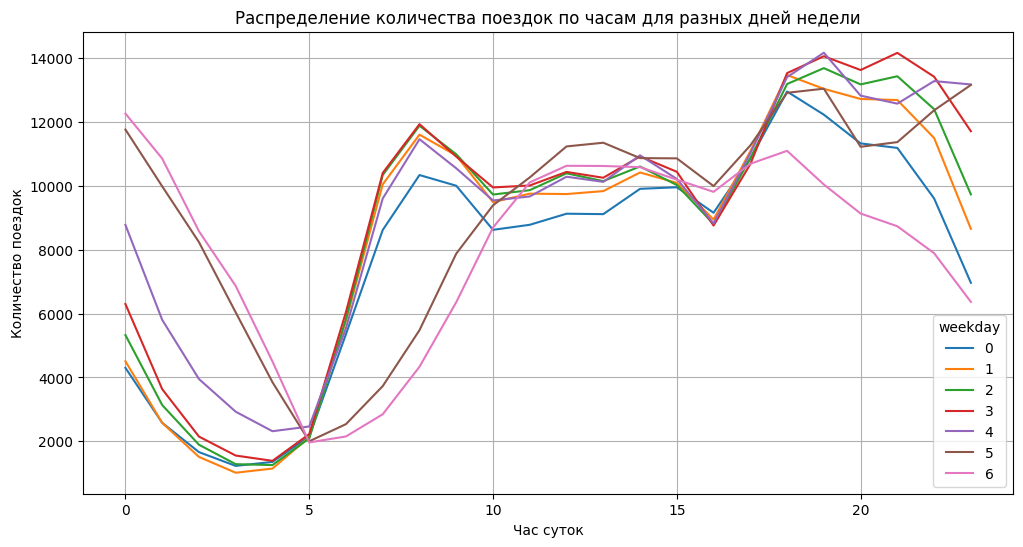

In [151]:
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday
df_hourly_weekday = df.groupby(['weekday', 'hour']).size().reset_index(name='trip_count')
palette = sns.color_palette("tab10", 7)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hourly_weekday, x='hour', y='trip_count', hue='weekday', palette=palette)
plt.title("Распределение количества поездок по часам для разных дней недели")
plt.xlabel("Час суток")
plt.ylabel("Количество поездок")
plt.grid(True)
plt.show()


**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?


**Ответ**: По месяцам мы видим не очень большую дисперсию результатов. Вероятно, это связано с тем что Нью-Йорк, город постиндустриальный, его экономическая и социальная жизнь не очень сильно зависит от естественных природных циклов, поэтому смена времен года не очень сильно влияет на активность. Для разных дней недели очертания графика различаются сильнее, но в целом сохраняют узнаваемость. Эти различия стоит объяснять деловым и общественным недельным циклом Нью-Йорка, наличием выходных, привычек и традиций по устроению деловых встреч и досуга. Стоит Выделить Воскресенье и, возможно, субботу как дни с наибольшей амплитудой, сильнейшими перепадами. Они больше всего не похожи на остальные дни. Что касается часов, здесь мы видим различия во много раз, особенно стоит выделить 5 утра как минимум и 18-19 часов как максимум активности. С 7 до 16 есть стабильный период в который стоит ожидать примерно одинаковое количество поездок для всего временного отрезка.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [152]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import train_test_split

df['day_of_year'] = df['pickup_datetime'].dt.day_of_year

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42)


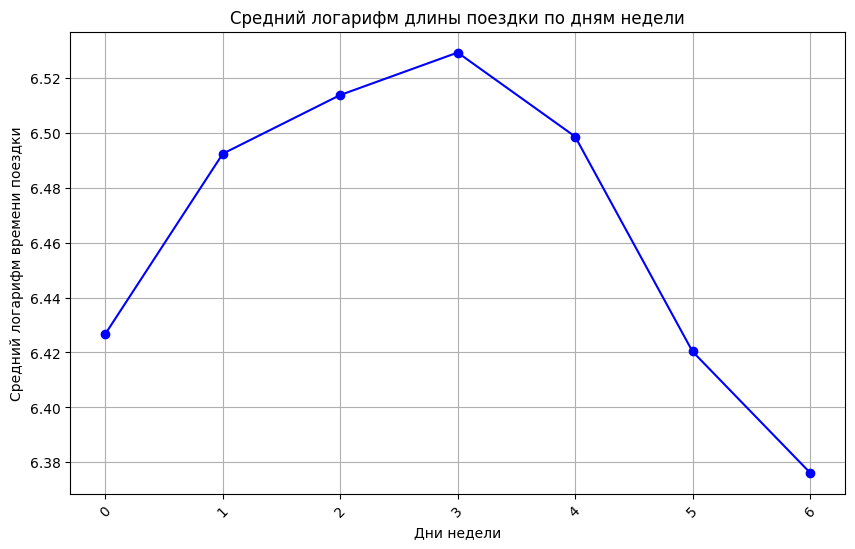

In [153]:
df_weekdays = X_train.groupby('weekday')['log_trip_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_weekdays['weekday'], df_weekdays['log_trip_duration'], marker='o', linestyle='-', color='b')
plt.title("Средний логарифм длины поездки по дням недели")
plt.xlabel("Дни недели")
plt.ylabel("Средний логарифм времени поездки")
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

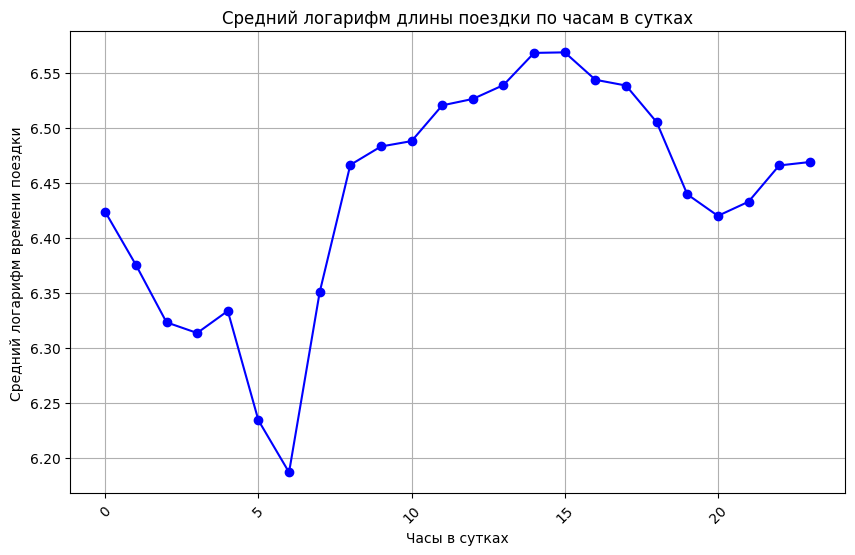

In [154]:
df_weekdays = X_train.groupby('hour')['log_trip_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_weekdays['hour'], df_weekdays['log_trip_duration'], marker='o', linestyle='-', color='b')
plt.title("Средний логарифм длины поездки по часам в сутках")
plt.xlabel("Часы в сутках")
plt.ylabel("Средний логарифм времени поездки")
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

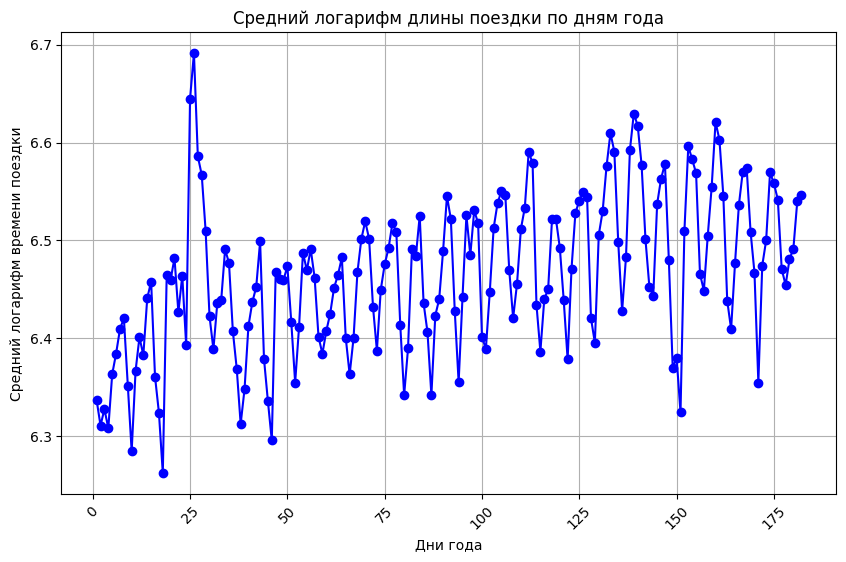

In [155]:
df_weekdays = X_train.groupby('day_of_year')['log_trip_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_weekdays['day_of_year'], df_weekdays['log_trip_duration'], marker='o', linestyle='-', color='b')
plt.title("Средний логарифм длины поездки по дням года")
plt.xlabel("Дни года")
plt.ylabel("Средний логарифм времени поездки")
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Ответ**: По часам в сутках и дням недели похожи. По всей видимости рынок работает так, что чем больше спрос тем дольше едет такси, это можно связать с банальнйо загруженностью трафика, количество поездок на такси это хороший прокси для загруженности инфраструктуры в целом. 

В дни аномальной метели средний логарифм поездки значительно выше, что логично. Также в день памяти средний логарифм сильно просел, видимо инфраструктура менее загружена из-за отсутсвия мероприятий + в тот день сломался сервер аэропорта и полеты перенесли, а в аэропорт часто долго ехать.

Тренд от дня в году однозначно положительный, со временем длина поездки растёт

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [156]:
df_sorted = df_grouped.sort_values(by='count', ascending=True).head(5)
df['anomal_memorial'] = df['pickup_datetime'].dt.day_of_year == pd.to_datetime('2016-05-30').day_of_year
start_date = pd.to_datetime("2016-01-23").day_of_year
end_date = pd.to_datetime("2016-01-24").day_of_year
df['anomal_blizzard'] = df['pickup_datetime'].dt.day_of_year.between(start_date, end_date)




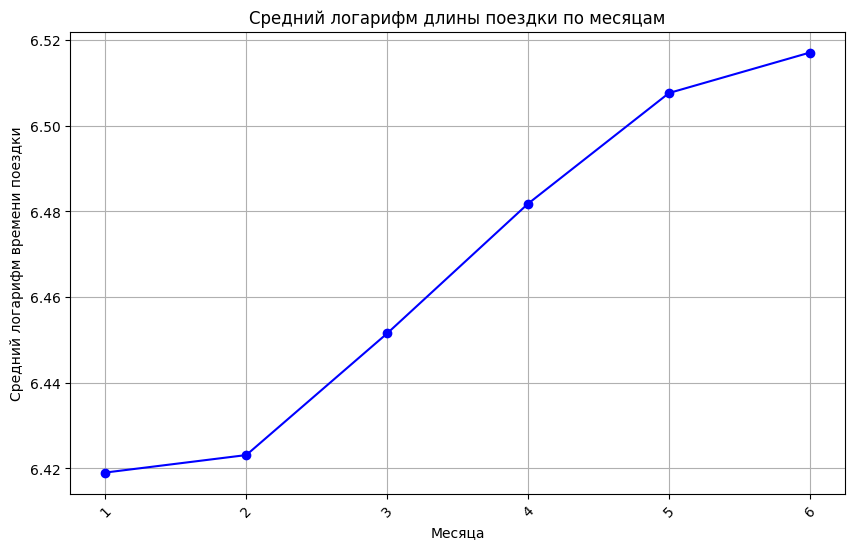

In [157]:
df_weekdays = X_train.groupby('month')['log_trip_duration'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(df_weekdays['month'], df_weekdays['log_trip_duration'], marker='o', linestyle='-', color='b')
plt.title("Средний логарифм длины поездки по месяцам")
plt.xlabel("Месяца")
plt.ylabel("Средний логарифм времени поездки")
plt.xticks(rotation=45)
plt.grid(visible=True)
plt.show()

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

**Ответ**: 

День в году - численный. Расстояние между днями имеет смысл, есть восходящий тренд, который можно аппроксимировать линейным.

День недели - категориальный. Нелинейный тренд + расстояние для вс и пн получилось бы максимальное что не имеет смысла.

Месяц - численный. очевиден хорошо аппроксимируемый линейно восходящий тренд. Расстояние между месяцами считается адекватно так как рассматриваем только полгода (июнь максимально уадлён от января).

Час - категориальный. Нельзя адекватно посчитать расстояние (получается 23 и 00 максимально далеки что неправда и т.п.). Тренд сильно нелинейный.

Аномальость периода - категориальные

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [158]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42) #Повторил чтобы обновить колонки, сори за реюз

df_encoded = pd.get_dummies(X_train, columns=['weekday', 'hour'], prefix=['weekday', 'hour'])

scaler = StandardScaler()

df_encoded['day_of_year'].dtype 

df_encoded[['day_of_year', 'month']] = scaler.fit_transform(df_encoded[['day_of_year', 'month']])
df_encoded.columns


Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'month', 'day_of_year', 'anomal_memorial',
       'anomal_blizzard', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23'],
      dtype='object')

In [159]:
df_test_encoded = pd.get_dummies(X_test, columns=['weekday', 'hour'], prefix=['weekday', 'hour'])
df_test_encoded[['day_of_year', 'month']] = scaler.fit_transform(df_test_encoded[['day_of_year', 'month']])
X_test = df_test_encoded[['anomal_memorial', 'anomal_blizzard', 'month', 'day_of_year', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']]


In [160]:
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
X_train = df_encoded[['anomal_memorial', 'anomal_blizzard', 'month', 'day_of_year', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']]

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")




Mean Squared Error: 0.7882298415850193


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [161]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [162]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

folium_test = df.sample(1000)

your_lat_values = folium_test.pickup_latitude
your_lon_values = folium_test.pickup_longitude

show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: Два аэропорта выделяются. Они на окраине и скорее всего люди едут из них в центр, то есть поездки наверняка особенно длинные, это полезно учесть. 

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [163]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [164]:
df['haversine'] = haversine_array(df.pickup_latitude, df.pickup_longitude, df.dropoff_latitude, df.dropoff_longitude)
df.haversine

0          1.498521
1          1.805507
2          6.385098
3          1.485498
4          1.188588
             ...   
1458639    1.225080
1458640    6.049836
1458641    7.824606
1458642    1.092564
1458643    1.134042
Name: haversine, Length: 1458644, dtype: float64

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [165]:
df['log_haversine'] = np.log1p(df.haversine)
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,weekday,day_of_year,anomal_memorial,anomal_blizzard,haversine,log_haversine
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,3,0,74,False,False,1.498521,0.915699
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,6,6,164,False,False,1.805507,1.031584
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,1,1,19,False,False,6.385098,1.999464
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,4,2,97,False,False,1.485498,0.910473
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,3,5,86,False,False,1.188588,0.783257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,4,4,99,False,False,1.225080,0.799793
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,1,6,10,False,False,6.049836,1.953004
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,4,4,113,False,False,7.824606,2.177544
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,1,1,5,False,False,1.092564,0.738390


Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [166]:
print(df['log_trip_duration'].corr(df['log_haversine']))
print(df['log_trip_duration'].corr(df['haversine']))

0.74988223739425
0.5735948311180159


**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

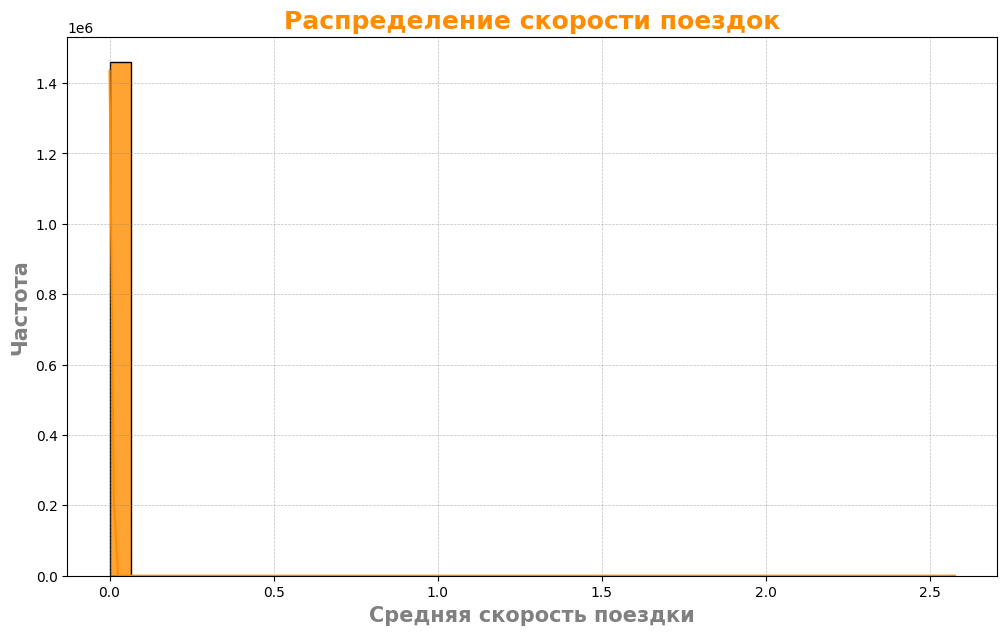

In [167]:
df['avg_speed'] = df.haversine / df.trip_duration
plt.figure(figsize=(12, 7))
sns.histplot(
    data=df, 
    x='avg_speed', 
    bins=40, 
    kde=True, 
    color="darkorange", 
    edgecolor="black",  
    alpha=0.8 
)

plt.title("Распределение скорости поездок", fontsize=18, fontweight='bold', color='darkorange')
plt.xlabel("Средняя скорость поездки", fontsize=15, fontweight='bold', color='gray')
plt.ylabel("Частота", fontsize=15, fontweight='bold', color='gray')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()


Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

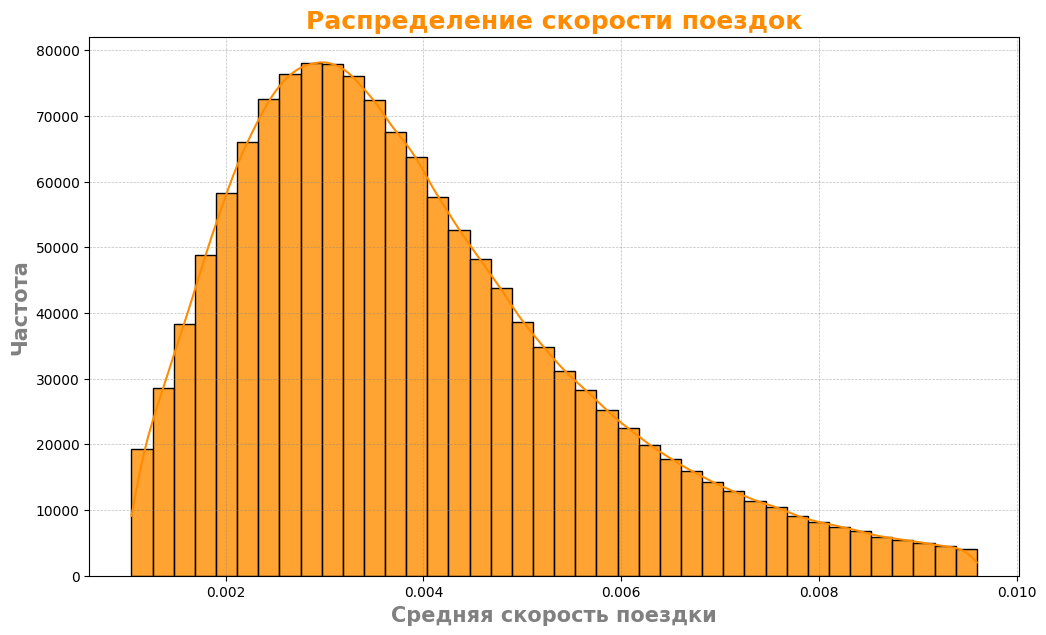

In [168]:
lower_bound = df['avg_speed'].quantile(0.025)
upper_bound = df['avg_speed'].quantile(0.975)

column = df['avg_speed'][(df['avg_speed'] >= lower_bound) & (df['avg_speed'] <= upper_bound)]

plt.figure(figsize=(12, 7))
sns.histplot(
    data=column, 

    bins=40, 
    kde=True, 
    color="darkorange", 
    edgecolor="black",  
    alpha=0.8 
)

plt.title("Распределение скорости поездок", fontsize=18, fontweight='bold', color='darkorange')
plt.xlabel("Средняя скорость поездки", fontsize=15, fontweight='bold', color='gray')
plt.ylabel("Частота", fontsize=15, fontweight='bold', color='gray')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [169]:
df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,weekday,day_of_year,anomal_memorial,anomal_blizzard,haversine,log_haversine,avg_speed
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,3,0,74,False,False,1.498521,0.915699,0.003293
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,6,6,164,False,False,1.805507,1.031584,0.002723
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,1,1,19,False,False,6.385098,1.999464,0.003006
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,4,2,97,False,False,1.485498,0.910473,0.003463
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,3,5,86,False,False,1.188588,0.783257,0.002732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,4,4,99,False,False,1.225080,0.799793,0.001575
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,1,6,10,False,False,6.049836,1.953004,0.009236
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,4,4,113,False,False,7.824606,2.177544,0.010242
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,1,1,5,False,False,1.092564,0.738390,0.002929


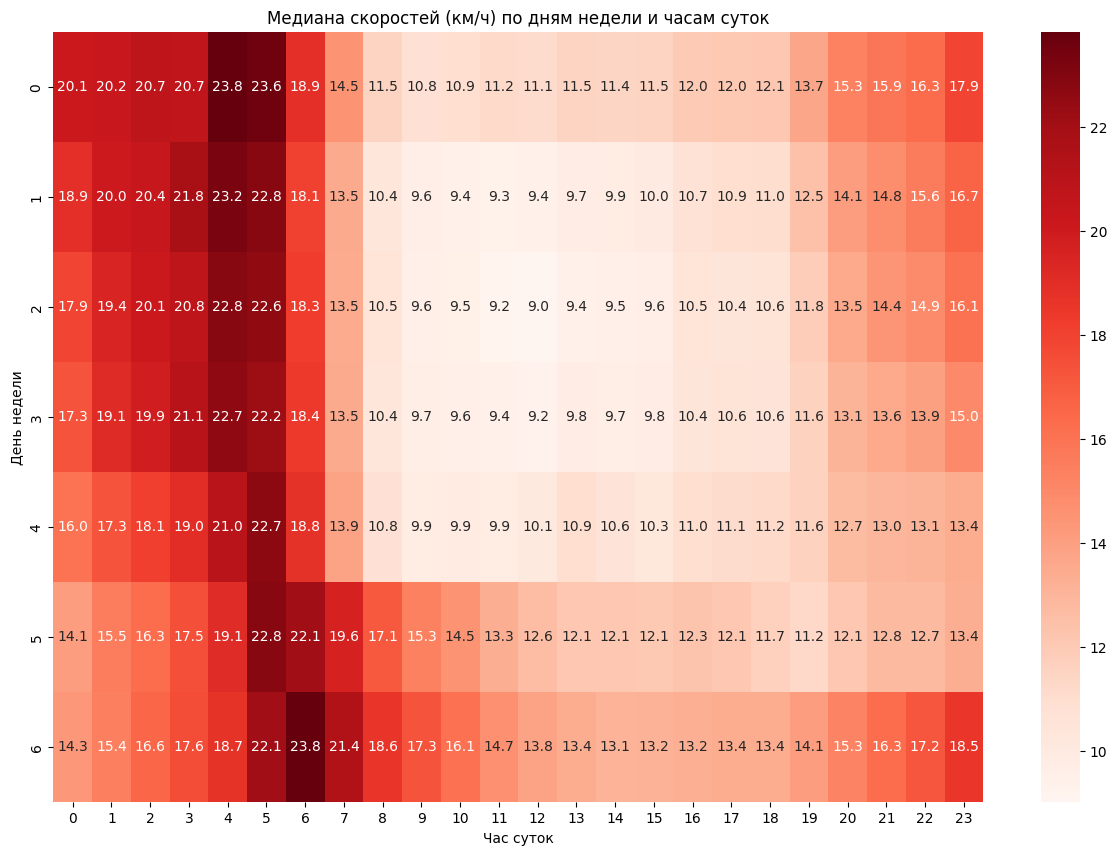

In [170]:
median_speed = df.groupby(['weekday', 'hour'])['avg_speed'].median().unstack()
median_speed *= 3600
plt.figure(figsize=(15, 10))
sns.heatmap(median_speed, annot=True, fmt=".1f", cmap="Reds")
plt.title("Медиана скоростей (км/ч) по дням недели и часам суток")
plt.xlabel("Час суток")
plt.ylabel("День недели")
plt.show()


Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: Потому что линейная комбинация от таргета, если ее добавить, r-squred будет 1)) А чтобы его посчитать нужен таргет уже

In [171]:
df = df.drop(columns='avg_speed')

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

**Ответ** Утром в понедельник и в воскресенье - максимальная. с 8 утра до 19 в будни - минимальная

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [172]:
df['busy_traffic'] = df['hour'].between(9, 19, inclusive='both') & (df['weekday'] < 5)

df['free_traffic'] = (
    (df['hour'].between(1, 5, inclusive='both') & (df['weekday'] < 4)) |
    (df['hour'].between(3, 5, inclusive='both') & (df['weekday'] == 4)) |
    (df['hour'].between(4, 7, inclusive='both') & (df['weekday'] > 4))
)


**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [173]:
JFK_lat = 40.644722 
JFK_lon = -73.784577 
LGA_lat = 40.775323
LGA_lon = -73.871711  


In [174]:
df['JFK_pickup'] = haversine_array(JFK_lat, JFK_lon, df['pickup_latitude'], df['pickup_longitude'] ) < 3.2
df['JFK_dropoff'] = haversine_array(JFK_lat, JFK_lon, df['dropoff_latitude'], df['dropoff_longitude']) < 3.2
df['LGA_pickup'] = haversine_array(LGA_lat, LGA_lon, df['pickup_latitude'],  df['pickup_longitude']) < 3.2
df['LGA_dropoff'] = haversine_array(LGA_lat, LGA_lon, df['dropoff_latitude'], df['dropoff_longitude']) < 3.2



Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

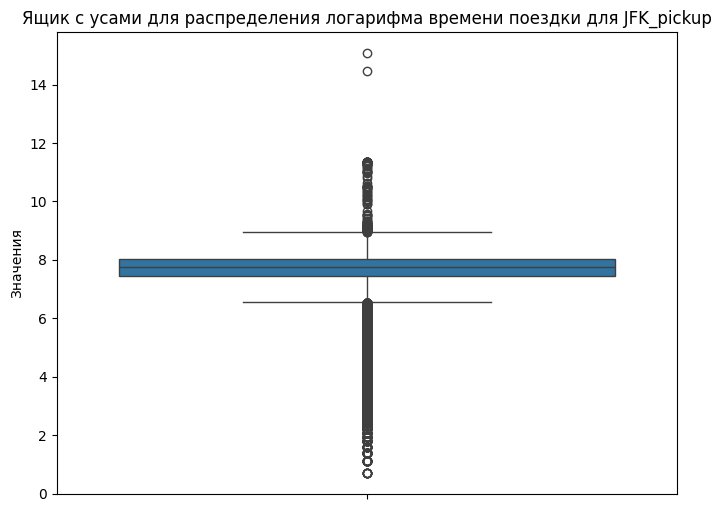

In [175]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[df['JFK_pickup'] == True]['log_trip_duration'])
plt.title("Ящик с усами для распределения логарифма времени поездки для JFK_pickup")
plt.ylabel("Значения")
plt.show()

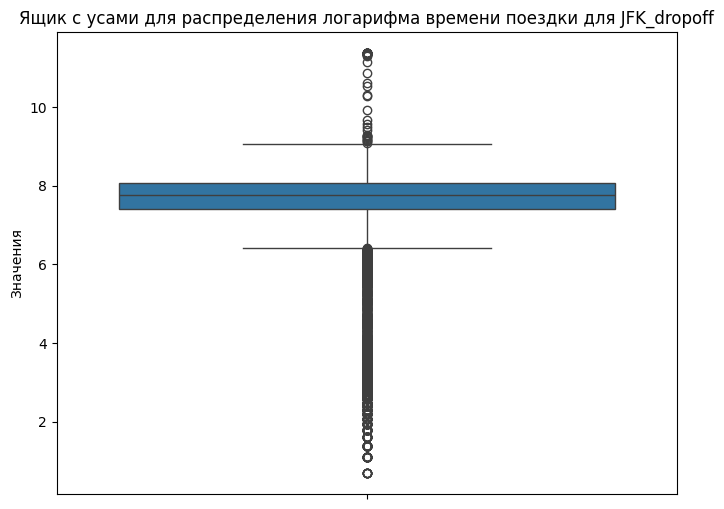

In [176]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[df['JFK_dropoff'] == True]['log_trip_duration'])
plt.title("Ящик с усами для распределения логарифма времени поездки для JFK_dropoff")
plt.ylabel("Значения")
plt.show()

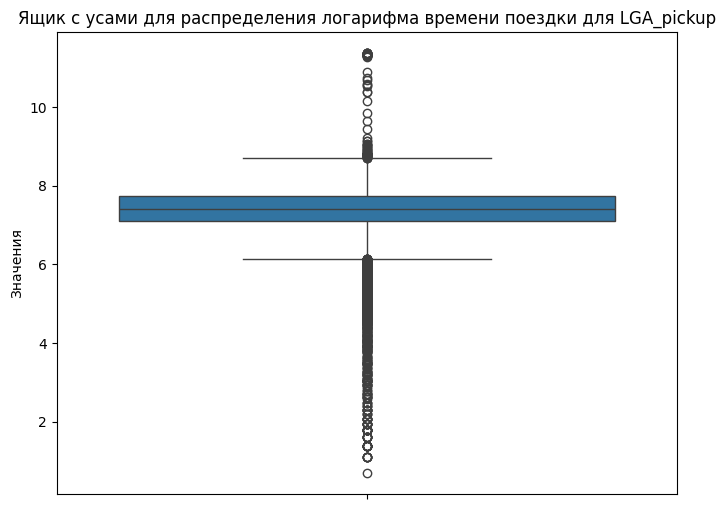

In [177]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[df['LGA_pickup'] == True]['log_trip_duration'])
plt.title("Ящик с усами для распределения логарифма времени поездки для LGA_pickup")
plt.ylabel("Значения")
plt.show()

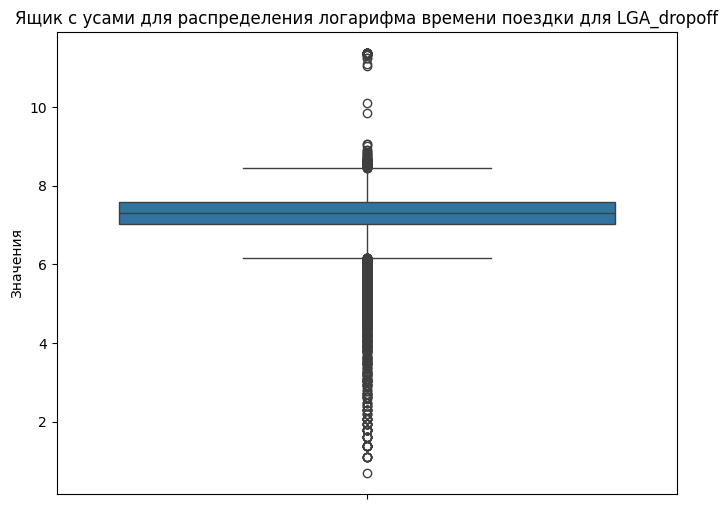

In [178]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[df['LGA_dropoff'] == True]['log_trip_duration'])
plt.title("Ящик с усами для распределения логарифма времени поездки для LGA_dropoff")
plt.ylabel("Значения")
plt.show()

In [179]:
df.log_trip_duration.median()

6.4967749901858625

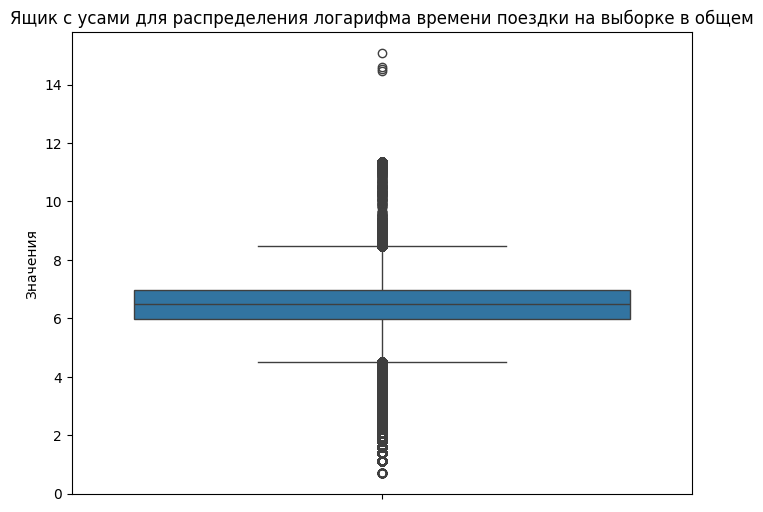

In [180]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['log_trip_duration'])
plt.title("Ящик с усами для распределения логарифма времени поездки на выборке в общем")
plt.ylabel("Значения")
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: Да, видно, что медиана для них отличается от медианы в среднем, в целом их распределение отличается от распределения в общем.

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

прав верх 40.795256, -73.914778
лев ниж 40.708924, -74.031634

In [181]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently

#использовал нейросети для дебага и написания кода

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows = 5, n_cols = 5):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.lat_bins = None
        self.lon_bins = None

    def show_map(self):
        
        return self

    def fit(self, X=None, y=None):
        
        min_lat, max_lat = 40.708924, 40.795256
        min_lon, max_lon = -74.031634, -73.914778

        self.lat_bins = np.linspace(min_lat, max_lat, self.n_rows + 1)
        self.lon_bins = np.linspace(min_lon, max_lon, self.n_cols + 1)
        
        return self
    
    def transform(self, X):

        pickup_lat_idx = np.digitize(X['pickup_latitude'], self.lat_bins) - 1
        pickup_lon_idx = np.digitize(X['pickup_longitude'], self.lon_bins) - 1
        dropoff_lat_idx = np.digitize(X['dropoff_latitude'], self.lat_bins) - 1
        dropoff_lon_idx = np.digitize(X['dropoff_longitude'], self.lon_bins) - 1

        X['pickup_cell'] = np.where(
            (pickup_lat_idx >= 0) & (pickup_lat_idx < self.n_rows) &
            (pickup_lon_idx >= 0) & (pickup_lon_idx < self.n_cols),
            pickup_lat_idx * self.n_cols + pickup_lon_idx, -1
        )
        X['dropoff_cell'] = np.where(
            (dropoff_lat_idx >= 0) & (dropoff_lat_idx < self.n_rows) &
            (dropoff_lon_idx >= 0) & (dropoff_lon_idx < self.n_cols),
            dropoff_lat_idx * self.n_cols + dropoff_lon_idx, -1
        )
        
        return X[['pickup_cell', 'dropoff_cell']].copy()
mgt = MapGridTransformer()
mgt.fit()
df[['pickup_cell', 'dropoff_cell']] = mgt.transform(df)

df

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,hour,month,weekday,day_of_year,anomal_memorial,anomal_blizzard,haversine,log_haversine,busy_traffic,free_traffic,JFK_pickup,JFK_dropoff,LGA_pickup,LGA_dropoff,pickup_cell,dropoff_cell
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,17,3,0,74,False,False,1.498521,0.915699,True,False,False,False,False,False,17,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,0,6,6,164,False,False,1.805507,1.031584,False,False,False,False,False,False,7,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,11,1,1,19,False,False,6.385098,1.999464,True,False,False,False,False,False,17,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,19,4,2,97,False,False,1.485498,0.910473,True,False,False,False,False,False,0,-1
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,13,3,5,86,False,False,1.188588,0.783257,False,False,False,False,False,False,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,13,4,4,99,False,False,1.225080,0.799793,True,False,False,False,False,False,12,6
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,7,1,6,10,False,False,6.049836,1.953004,False,True,False,False,False,False,11,-1
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,6,4,4,113,False,False,7.824606,2.177544,False,False,False,False,False,False,18,-1
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,15,1,1,5,False,False,1.092564,0.738390,True,False,False,False,False,False,12,12


**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [182]:
df = pd.get_dummies(df, columns=['pickup_cell', 'dropoff_cell'], prefix=['pickup_cell', 'dropoff_cell'])
df = pd.get_dummies(df, columns=['weekday', 'hour'], prefix=['weekday', 'hour'])

In [183]:
df[['log_haversine']] = scaler.fit_transform(df[['log_haversine']])

In [185]:
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42)


X_train = X_train.drop(columns=['haversine','id','vendor_id','pickup_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration','log_trip_duration'])

X_test = X_test.drop(columns=['haversine','id','vendor_id','pickup_datetime','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration','log_trip_duration'])

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(r2_score(y_test, y_pred))

Mean Squared Error: 0.47489839602389994
0.6431893920485724


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**:

 У провайдера могут быть какие-то характеристики которые сильно влияют на его поведение, автопарк у них разный, подход к бизнесу и т.п.

Число пассажиров добавляет доп время на посадку высадку и прочее, + могут выцепляться какие-то сценарии поездок типа много человек едет из бара или откуда-то ещё и место отпрравления влияет.

Информация о отваливании интернет соединения может говорить о дальности поездки и характеристиках автомобиля, интуиция также подсказывает что среди тех для кого этот флаг тру будет много выбросов из-за технических сбоев 

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [186]:
print(df['vendor_id'].value_counts())
print(df['passenger_count'].value_counts())
print(df['store_and_fwd_flag'].value_counts())

vendor_id
2    780302
1    678342
Name: count, dtype: int64
passenger_count
1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: count, dtype: int64
store_and_fwd_flag
N    1450599
Y       8045
Name: count, dtype: int64


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

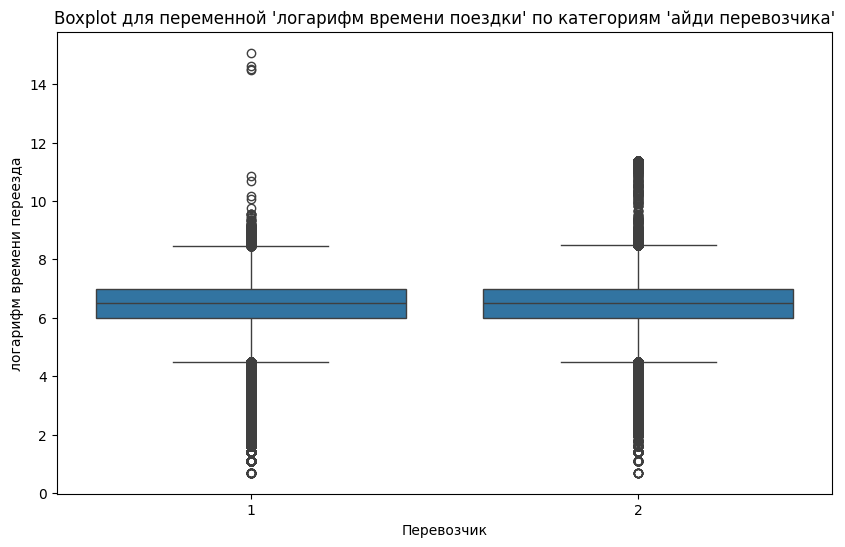

In [187]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vendor_id', y='log_trip_duration', data=df)
plt.title("Boxplot для переменной 'логарифм времени поездки' по категориям 'айди перевозчика'")
plt.xlabel("Перевозчик")
plt.ylabel("логарифм времени переезда")
plt.show()

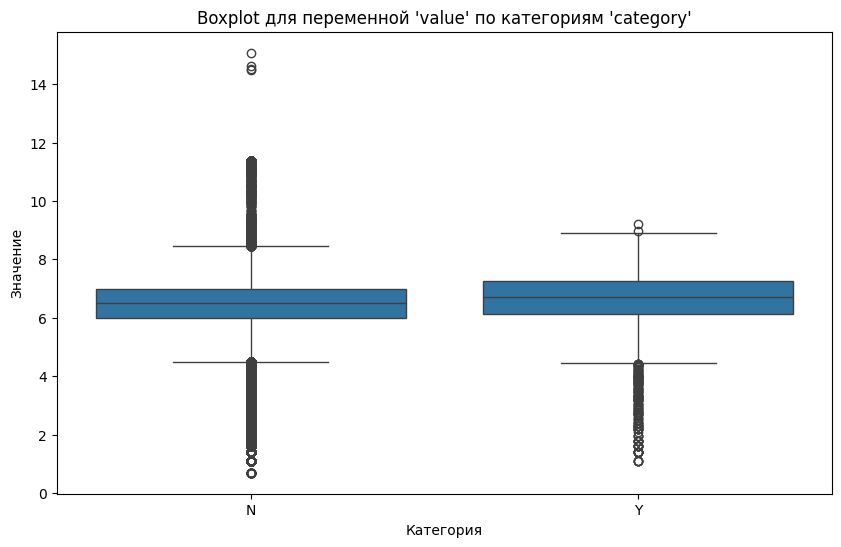

In [112]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=df)
plt.title("Boxplot для переменной 'Логарифм длины поездки' по категориям 'наличие флажка о потери соединения и переылки сообщения потом'")
plt.xlabel("Категория")
plt.ylabel("Значение")
plt.show()

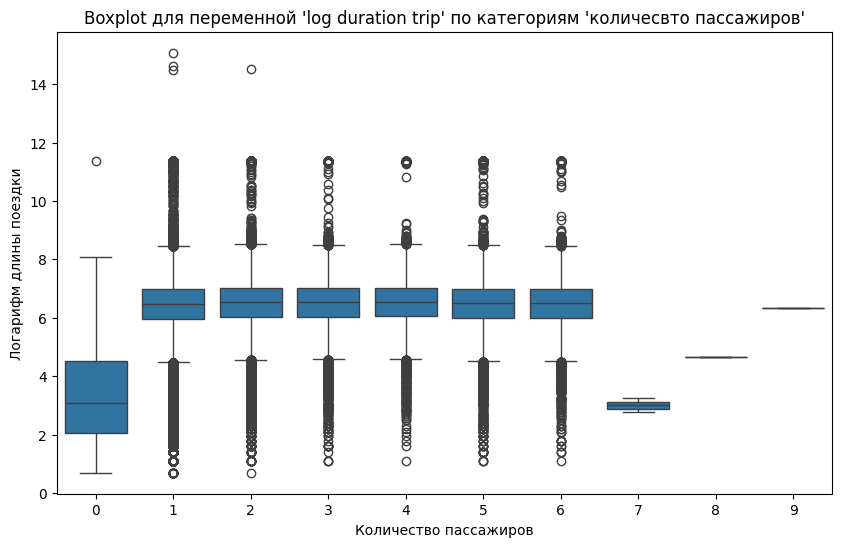

In [115]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='passenger_count', y='log_trip_duration', data=df)
plt.title("Boxplot для переменной 'log duration trip' по категориям 'количесвто пассажиров'")
plt.xlabel("Количество пассажиров")
plt.ylabel("Логарифм длины поездки")
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [188]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'N': 0, 'Y': 1}).astype(int)
df['vendor_id'] = (df['vendor_id'] == 2).astype(int)

C:\Users\ANDREW_LOCAL\AppData\Local\Temp\ipykernel_15940\4120720241.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['store_and_fwd_flag'] = df['store_and_fwd_flag'].replace({'N': 0, 'Y': 1}).astype(int)


**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Ответ**: Несмотря на то что медианы похожи хвосты распредления у разны категорий сильно различюатся так что потенциал в целом есть

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [198]:


df_pas = df.groupby('passenger_count')['log_trip_duration'].mean().reset_index()

df_pas

plt.figure(figsize=(10, 6))
plt.plot(df_pas['passenger_count'], df_pas['log_trip_duration'], marker='o', linestyle='-', color='b')

plt.title("Логарифм времени поездки относительное количества пассажиров")
plt.xlabel("количество пассажиров")
plt.ylabel("Логарифм времени поездки")
plt.xticks(rotation=45)
plt.grid(visible=True)


plt.show()




KeyError: 'passenger_count'

In [203]:

#df = pd.get_dummies(df, columns=['store_and_fwd_flag', 'vendor_id', 'passenger_count'], prefix=['store_and_fwd_flag', 'vendor_id', 'passenger_count'])

X_train, X_test, y_train, y_test = train_test_split(df, df['log_trip_duration'], test_size=0.3, random_state=42)


X_train = X_train.drop(columns=['id','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration','log_trip_duration'])

X_test = X_test.drop(columns=['id','pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','trip_duration','log_trip_duration'])

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(r2_score(y_test, y_pred))

Mean Squared Error: 0.4702612219336697
0.6501235688488293


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [212]:
X_train['time'] = y_train
X_train['time_exp'] = np.exp(y_train)

In [ ]:
lower_bound = X_train['haversine'].quantile(0.025)
upper_bound = X_train['haversine'].quantile(0.975)

X_train['haversine'] = X_train['haversine'][(X_train['haversine'] >= lower_bound) & (X_train['haversine'] <= upper_bound)]

plt.figure(figsize=(12, 7))
sns.histplot(
    data=X_train.haversine, 

    bins=40, 
    kde=True, 
    color="darkorange", 
    edgecolor="black",  
    alpha=0.8 
)

plt.title("Распределение расстояния поездки", fontsize=18, fontweight='bold', color='darkorange')
plt.xlabel("расстояние", fontsize=15, fontweight='bold', color='gray')
plt.ylabel("Частота", fontsize=15, fontweight='bold', color='gray')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()



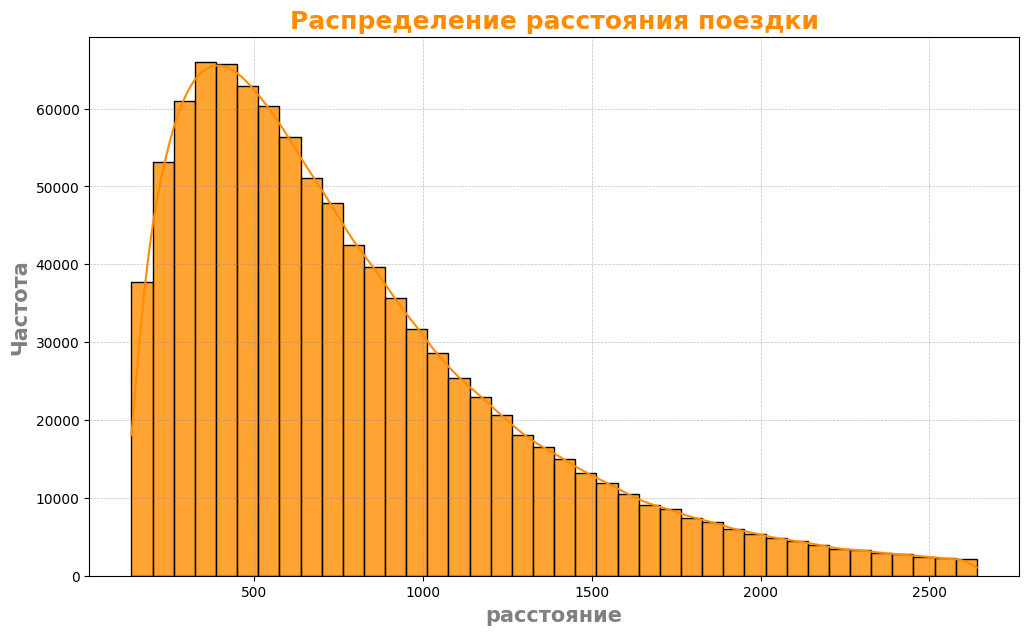

In [214]:
lower_bound = X_train['time_exp'].quantile(0.025)
upper_bound = X_train['time_exp'].quantile(0.975)

X_train['time_exp'] = X_train['time_exp'][(X_train['time_exp'] >= lower_bound) & (X_train['time_exp'] <= upper_bound)]

plt.figure(figsize=(12, 7))
sns.histplot(
    data=X_train.time_exp, 

    bins=40, 
    kde=True, 
    color="darkorange", 
    edgecolor="black",  
    alpha=0.8 
)

plt.title("Распределение времени поездки", fontsize=18, fontweight='bold', color='darkorange')
plt.xlabel("Время", fontsize=15, fontweight='bold', color='gray')
plt.ylabel("Частота", fontsize=15, fontweight='bold', color='gray')

plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

plt.show()

In [ ]:
train

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [215]:
df

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,month,day_of_year,anomal_memorial,anomal_blizzard,haversine,log_haversine,busy_traffic,free_traffic,JFK_pickup,JFK_dropoff,LGA_pickup,LGA_dropoff,pickup_cell_-1,pickup_cell_0,pickup_cell_1,pickup_cell_2,pickup_cell_3,pickup_cell_4,pickup_cell_5,pickup_cell_6,pickup_cell_7,pickup_cell_8,pickup_cell_9,pickup_cell_10,pickup_cell_11,pickup_cell_12,pickup_cell_13,pickup_cell_14,pickup_cell_15,pickup_cell_16,pickup_cell_17,pickup_cell_18,...,weekday_5,weekday_6,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,store_and_fwd_flag_0,store_and_fwd_flag_1,vendor_id_0,vendor_id_1,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,passenger_count_8,passenger_count_9
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,455,6.122493,3,74,False,False,1.498521,-0.540358,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,663,6.498282,6,164,False,False,1.805507,-0.355577,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,2124,7.661527,1,19,False,False,6.385098,1.187715,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,429,6.063785,4,97,False,False,1.485498,-0.548690,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,435,6.077642,3,86,False,False,1.188588,-0.751538,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.7401

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [220]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)


mse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(r2_score(y_test, y_pred))

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [219]:
y_train = X_train['time']
X_train.drop(['time', 'time_exp'])
#y_train_pred = ridge_model.predict(X_train)


KeyError: "['time', 'time_exp'] not found in axis"

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сохраните наилучшее значение, как бенчмарк на будущее

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
best_rmsle = ...

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.